In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.testing import (assert_equal, assert_almost_equal, assert_allclose)
%matplotlib inline

## Problem 1
Create a function `largest_invoice` that reads the file `/mnt/data/public/retaildata/Online Retail.csv` and returns a `pandas` `Series`. The series contains the 10 invoices with the most number of invoice lines arranged in decreasing order. The values of the series is the number of invoice lines and the index is the invoice number of type `str`.

In [26]:
# YOUR CODE HERE
def largest_invoice():
    '''read the file /mnt/data/public/retaildata/Online Retail.csv and return
    a pandas Series. The series contains the 10 invoices with the most number 
    of invoice lines arranged in decreasing order. The values of the series 
    is the number of invoice lines and the index is the invoice number of 
    type str.
    
    Returns
    -------------
    s1: pandas Series 
        contains the 10 invoices with the most number of invoice lines 
        arranged in decreasing order
    
    '''
    df1 = pd.read_csv('/mnt/data/public/retaildata/Online Retail.csv')
    df1 = df1.astype({'InvoiceNo': str})
    s1 = df1['InvoiceNo'].value_counts()[:10]
    s1.index.name = 'InvoiceNo'
    return s1

In [27]:
largest_invoice()

InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
Name: InvoiceNo, dtype: int64

In [28]:
invoices = largest_invoice()
assert_equal(isinstance(invoices, pd.Series), True)
assert_equal(len(invoices), 10)
assert_equal(invoices.index.name, 'InvoiceNo')
assert_equal(
    invoices.index.tolist()[:5], 
    ['573585', '581219', '581492', '580729', '558475'])
assert_equal(
    invoices.tolist()[:5], 
    [1114, 749, 731, 721, 705])

## Problem 2
Create a function `most_daily_tagged_artists` that reads `/mnt/data/public/hetrec2011/lastfm/user_taggedartists.dat` and returns a list of the 10 users that tagged the most unique artist in a day sorted by descending order.

In [152]:
def most_daily_tagged_artists():
    ''' read /mnt/data/public/hetrec2011/lastfm/user_taggedartists.dat and 
    return a list of the 10 users that tagged the most unique artist in a day
    sorted by descending order.
    
    Returns
    -------------
    li_users: List 
        contains the 10 users that tagged the most unique artist in a day
        sorted by descending order.
    
    '''
    df2 = pd.read_csv('/mnt/data/public/hetrec2011/lastfm/'
                      'user_taggedartists.dat')
    df2
    df2 = df2[df2.columns[0]].str.split('\t', expand = True).astype(
        {3: str, 4: str, 5: str})
    
    df2[3] = df2[5] + '-' + df2[4] + '-' + df2[3]
    df2 = df2[[0,1,2,3]]
    df2.columns = ['userID','artistID','tagID','date']

    yr_li = []
    uid_most_li = []
    most_uc_li = []

    for k,v in df2.groupby('date'):

        most_uc = 0
        uid_most = ''
        for k2,v2 in v.groupby('userID')['artistID']:
            
            uniq_count = len(v2.unique())
            if uniq_count > most_uc:
                most_uc = uniq_count
                uid_most = k2

        yr_li.append(k)
        uid_most_li.append(uid_most)
        most_uc_li.append(most_uc)

    data = {'year':pd.Series(yr_li),'userID':pd.Series(uid_most_li),
            'UniqueTags':pd.Series(most_uc_li)}
    df2_final = pd.DataFrame(data)
    df2_final = df2_final.sort_values(by=['UniqueTags'], ascending = False) 
    li_users = df2_final['userID'].astype(int).head(10).to_list()
    return li_users

In [153]:
users = most_daily_tagged_artists()
assert_equal(users[:5], [43, 1547, 1249, 1929, 2030])

## Problem 3
Create a function `bin_names` that reads `/mnt/data/public/brazilian-ecommerce/olist_products_dataset.csv`, partitions `product_name_lenght` (sic) into 10 equal-sized `pd.Interval` then returns a `pandas.Series` with the bin as index and the median `product_description_lenght` (sic) for that bin as value. The bins should be open to the left but closed to right. Extend the range of `product_name_lenght` by 0.1% on each side to include the minimum and maximum values of `product_name_lenght`.

In [51]:
def bin_names():
    '''read /mnt/data/public/brazilian-ecommerce/olist_products_dataset.csv, 
    partitions product_name_lenght (sic) into 10 equal-sized pd.Interval then 
    return a pandas.Series with the bin as index and the median 
    product_description_lenght (sic) for that bin as value. The bins should be
    open to the left but closed to right. Extend the range of 
    product_name_lenght by 0.1% on each side to include the minimum and 
    maximum values of product_name_lenght.
    
    Returns
    -------------
    output3: pandas Series 
    
    '''
    df = pd.read_csv("/mnt/data/public/brazilian-ecommerce/"
                     "olist_products_dataset.csv")
    df['bins'] = pd.cut(df['product_name_lenght'], bins = 10)
    output3 = df.groupby('bins')['product_description_lenght'].median()
    return output3

In [52]:
mean_desc = bin_names()
assert_equal(
    mean_desc.index[:5].tolist(),
    [pd.Interval(4.929, 12.1, closed='right'),
     pd.Interval(12.1, 19.2, closed='right'),
     pd.Interval(19.2, 26.3, closed='right'),
     pd.Interval(26.3, 33.4, closed='right'),
     pd.Interval(33.4, 40.5, closed='right')]
)
assert_equal(mean_desc[:5].tolist(), [344.5, 449.5, 468.0, 519.0, 525.0])

## Problem 4
Create a function `charge_per_state` that reads the first 1M data lines of `/mnt/data/public/cms-gov/Medicare_Provider_Util_Payment_PUF_CY2013/Medicare_Provider_Util_Payment_PUF_CY2013.txt` and returns a `matplotlib` `AxesSubplot` that replicates the figure below, which shows the mean `AVERAGE_SUBMITTED_CHRG_AMT` for every `NPPES_PROVIDER_STATE`. The figure size is 12 inches $\times$ 8 inches.

<img src="charge_per_state.png" />

In [9]:
def charge_per_state():
    '''read the first 1M data lines of /mnt/data/public/cms-gov/
    Medicare_Provider_Util_Payment_PUF_CY2013/
    Medicare_Provider_Util_Payment_PUF_CY2013.txt and returns a matplotlib
    AxesSubplot that replicates the figure below, which shows the mean
    AVERAGE_SUBMITTED_CHRG_AMT for every NPPES_PROVIDER_STATE. The figure size
    is 12 inches  ×  8 inches.
    
    Returns
    -------------
    ax: matplotlib AxesSubplot 
    
    '''
    with open('/mnt/data/public/cms-gov/Medicare_Provider_Util_Payment_PUF_'
              'CY2013/Medicare_Provider_Util_Payment_PUF_CY2013.txt') as f:
        text = f.readlines()[:1000002]

    


    col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,\
    col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,\
    col26,col27,col28 = \
    [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],\
    [],[],[],[],


    lists = [col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,\
             col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,\
             col23,col24,col25,col26,col27,col28]

    for i in range(len(text)):
        if i > 1:
            row = text[i].split('\t')

            for index in range(len(row)):
                lists[index].append(row[index])
                
    df4_cols = text[0].split('\t')
    vals = [pd.Series(i) for i in lists]

    data4 = {k:v for k,v in zip(df4_cols,vals)}

    df4 = pd.DataFrame(data4)

    df4 = df4.replace('', np.nan)

    df4['AVERAGE_SUBMITTED_CHRG_AMT'] = \
        df4['AVERAGE_SUBMITTED_CHRG_AMT'].astype(float) 
    
    Sr_plot = df4.groupby('NPPES_PROVIDER_STATE')\
        ['AVERAGE_SUBMITTED_CHRG_AMT'].mean()

    fig, ax = plt.subplots(1,1,figsize=(12,8))

    ax.bar(Sr_plot.index,Sr_plot.values)
    ax.set_xlabel('NPPES_PROVIDER_STATE');
    ax.set_ylabel('Average submitted charge amount ($)');
    plt.xticks(rotation = 90)
    plt.tight_layout();

    return ax

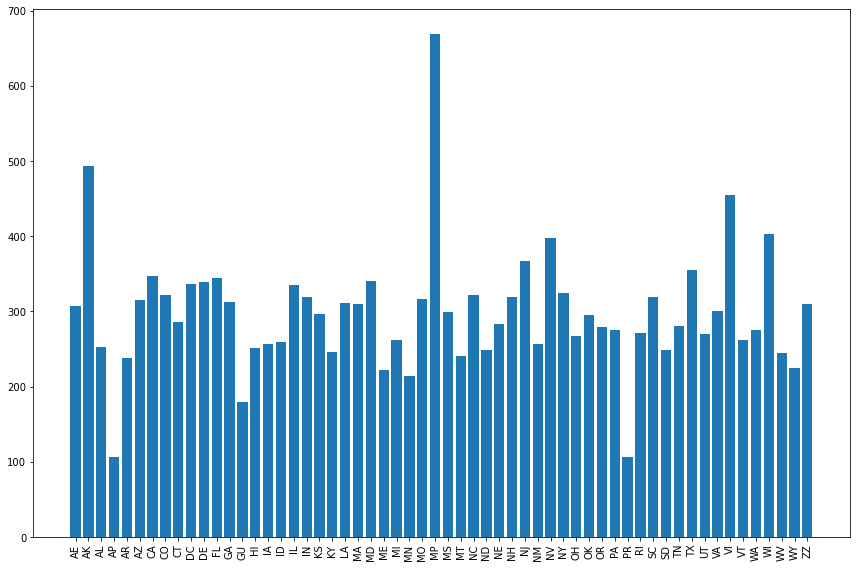

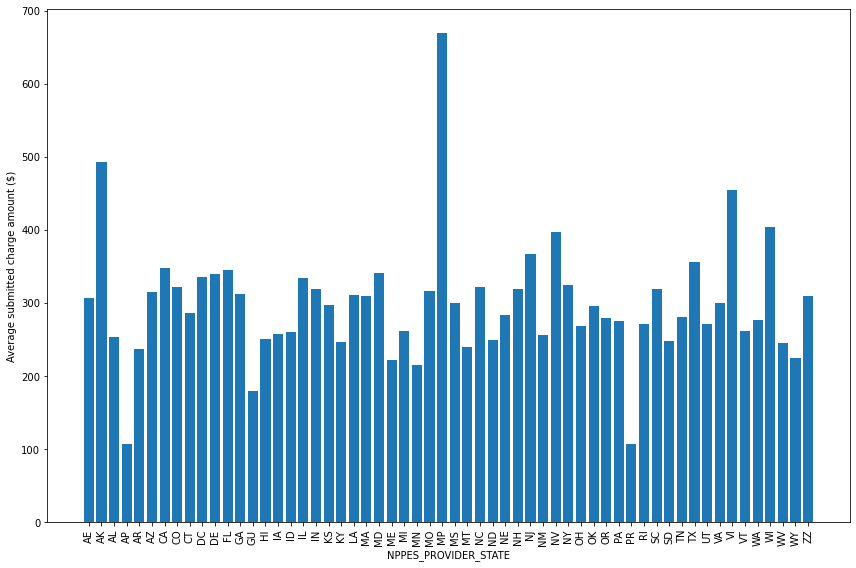

In [10]:
ax = charge_per_state()
assert_equal(len(ax.get_xticklabels()), 58)
assert_equal(
    [tl.get_text() for tl in ax.get_xticklabels()[:10]],
    ['AE', 'AK', 'AL', 'AP', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC']
)
assert_equal(
    [tl.get_text() for tl in ax.get_yticklabels()],
    ['0', '100', '200', '300', '400', '500', '600', '700', '800']
)
assert_equal(ax.get_xlabel(), 'NPPES_PROVIDER_STATE')
assert_equal(ax.get_ylabel(), 'Average submitted charge amount ($)')
rects = [rect.get_height() 
         for rect in ax.get_children() 
         if isinstance(rect, plt.Rectangle)]
assert_allclose(
    rects[:10],
    [306.74434995373815, 493.4312785140697, 252.9061422397318, 
     106.83333333333333, 237.47530926640837, 315.11112284904567, 
     347.62477427325786, 321.9778246172538, 285.983152723109, 
     336.1378168844402]
)

## Problem 5
Create a function `voters_profile` that reads `/mnt/data/public/elections/comelec/voters_profile/philippine_2016_voter_profile_by_provinces_and_cities_or_municipalities_including_districts.csv` and returns a `matplotlib.Figure` that replicates the plot below. The subplots are 10-bin histograms of each numerical column in the data.  The figure size is 10 inches $\times$ 12 inches with a DPI of 300. The `hspace` of the is grid is 0.5 and the `wspace` is 0.4.

<img src="voters_profile.png" style="width: 100em" />

In [105]:
def voters_profile():
    '''read /mnt/data/public/elections/comelec/voters_profile/
    philippine_2016_voter_profile_by_provinces_and_cities_or_municipalities_
    including_districts.csv and return a matplotlib.Figure that replicates 
    the plot below. The subplots are 10-bin histograms of each numerical 
    column in the data. The figure size is 10 inches  ×  12 inches with a DPI 
    of 300. The hspace of the is grid is 0.5 and the wspace is 0.4.
    
    Returns
    -------------
    fig: matplotlib Figure 
    
    '''
    df5 = pd.read_csv('/mnt/data/public/elections/comelec/voters_profile/'
                      'philippine_2016_voter_profile_by_provinces_and_'
                      'cities_or_municipalities_including_districts.csv')

    
    fig, ax_ = plt.subplots(5,4, figsize = (10,12))


    fig.subplots_adjust(hspace = 0.5, wspace = 0.4)
    fig.dpi = 300

    li_plots =[
        ['17-19','20-24','25-29','30-34'],
        ['35-39','40-44','45-49','50-54'],
        ['55-59','60-64','65-above','female'],
        ['indigenous_people','legally_seperated','male','married'],
        ['person_with_disability','registered_voter','single','widow']
    ]
    

    for i in range(len(li_plots)):
        for j in range(len(li_plots[i])):

            ax_[i][j].hist(df5[li_plots[i][j]], bins = 10)
            ax_[i][j].set_title(li_plots[i][j])
            ax_[i][j].grid()


    plt.show()
    return fig

,region,province,city_or_municipality_including_districts,registered_voter,male,female,17-19,20-24,25-29,30-34,...,55-59,60-64,65-above,literacy,indigenous_people,person_with_disability,single,married,widow,legally_seperated
0,Special Provinces,Special Provinces,Isabela City,68450,33356,35094,7494,10747,9730,8212,...,3540,2656,3944,94.87%,1,786,31969,33585,2181,715
1,Special Provinces,Special Provinces,Cotabato City,103530,49470,54060,3516,12797,14826,14969,...,6197,4442,7349,99.81%,0,657,48566,51002,2865,1097
2,NCR,Manila,"Manila, 3rd District",148663,71888,76775,4627,19204,21810,18830,...,9329,7307,10399,99.98%,1,108,88439,56661,3032,531
3,NCR,Manila,"Manila, 5th District",188080,88348,99732,5008,23289,26186,23465,...,12696,9896,13911,99.96%,0,197,107194,74998,4583,1305
4,NCR,Manila,"Manila, 6th District",142151,65866,76285,3607,17710,19461,17534,...,10094,8240,12226,99.99%,0,59,78789,59789,3072,501


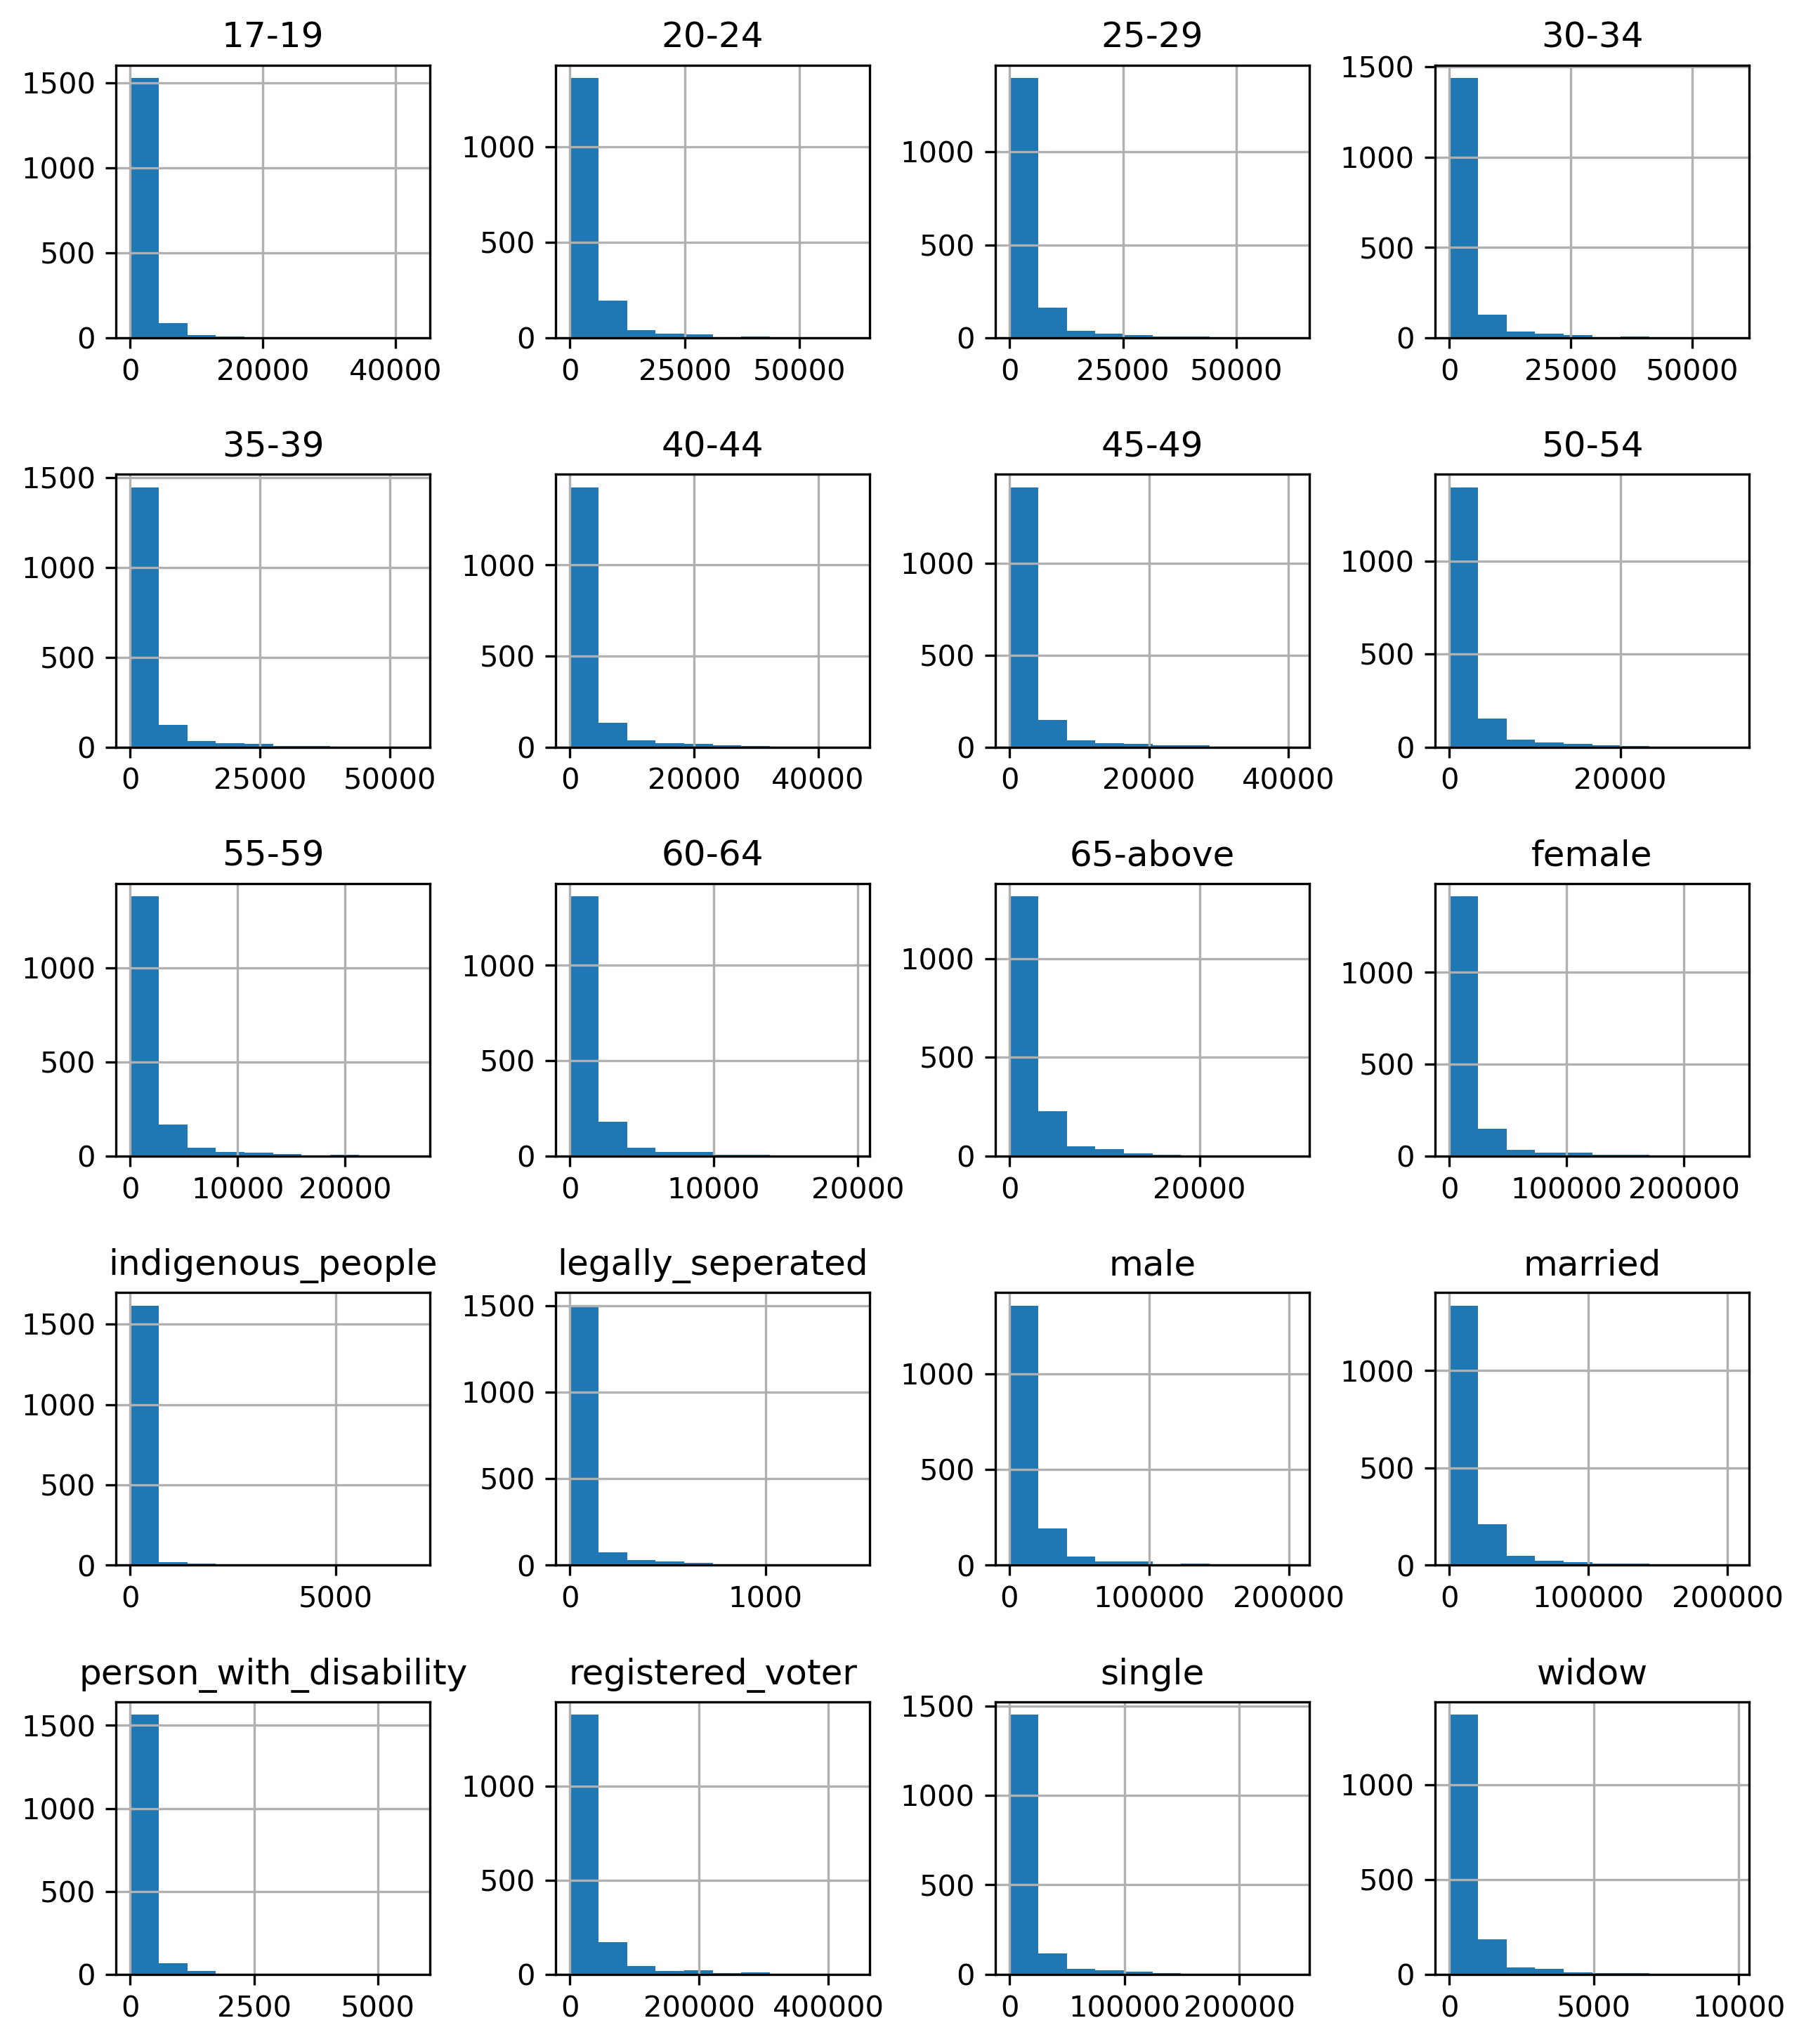

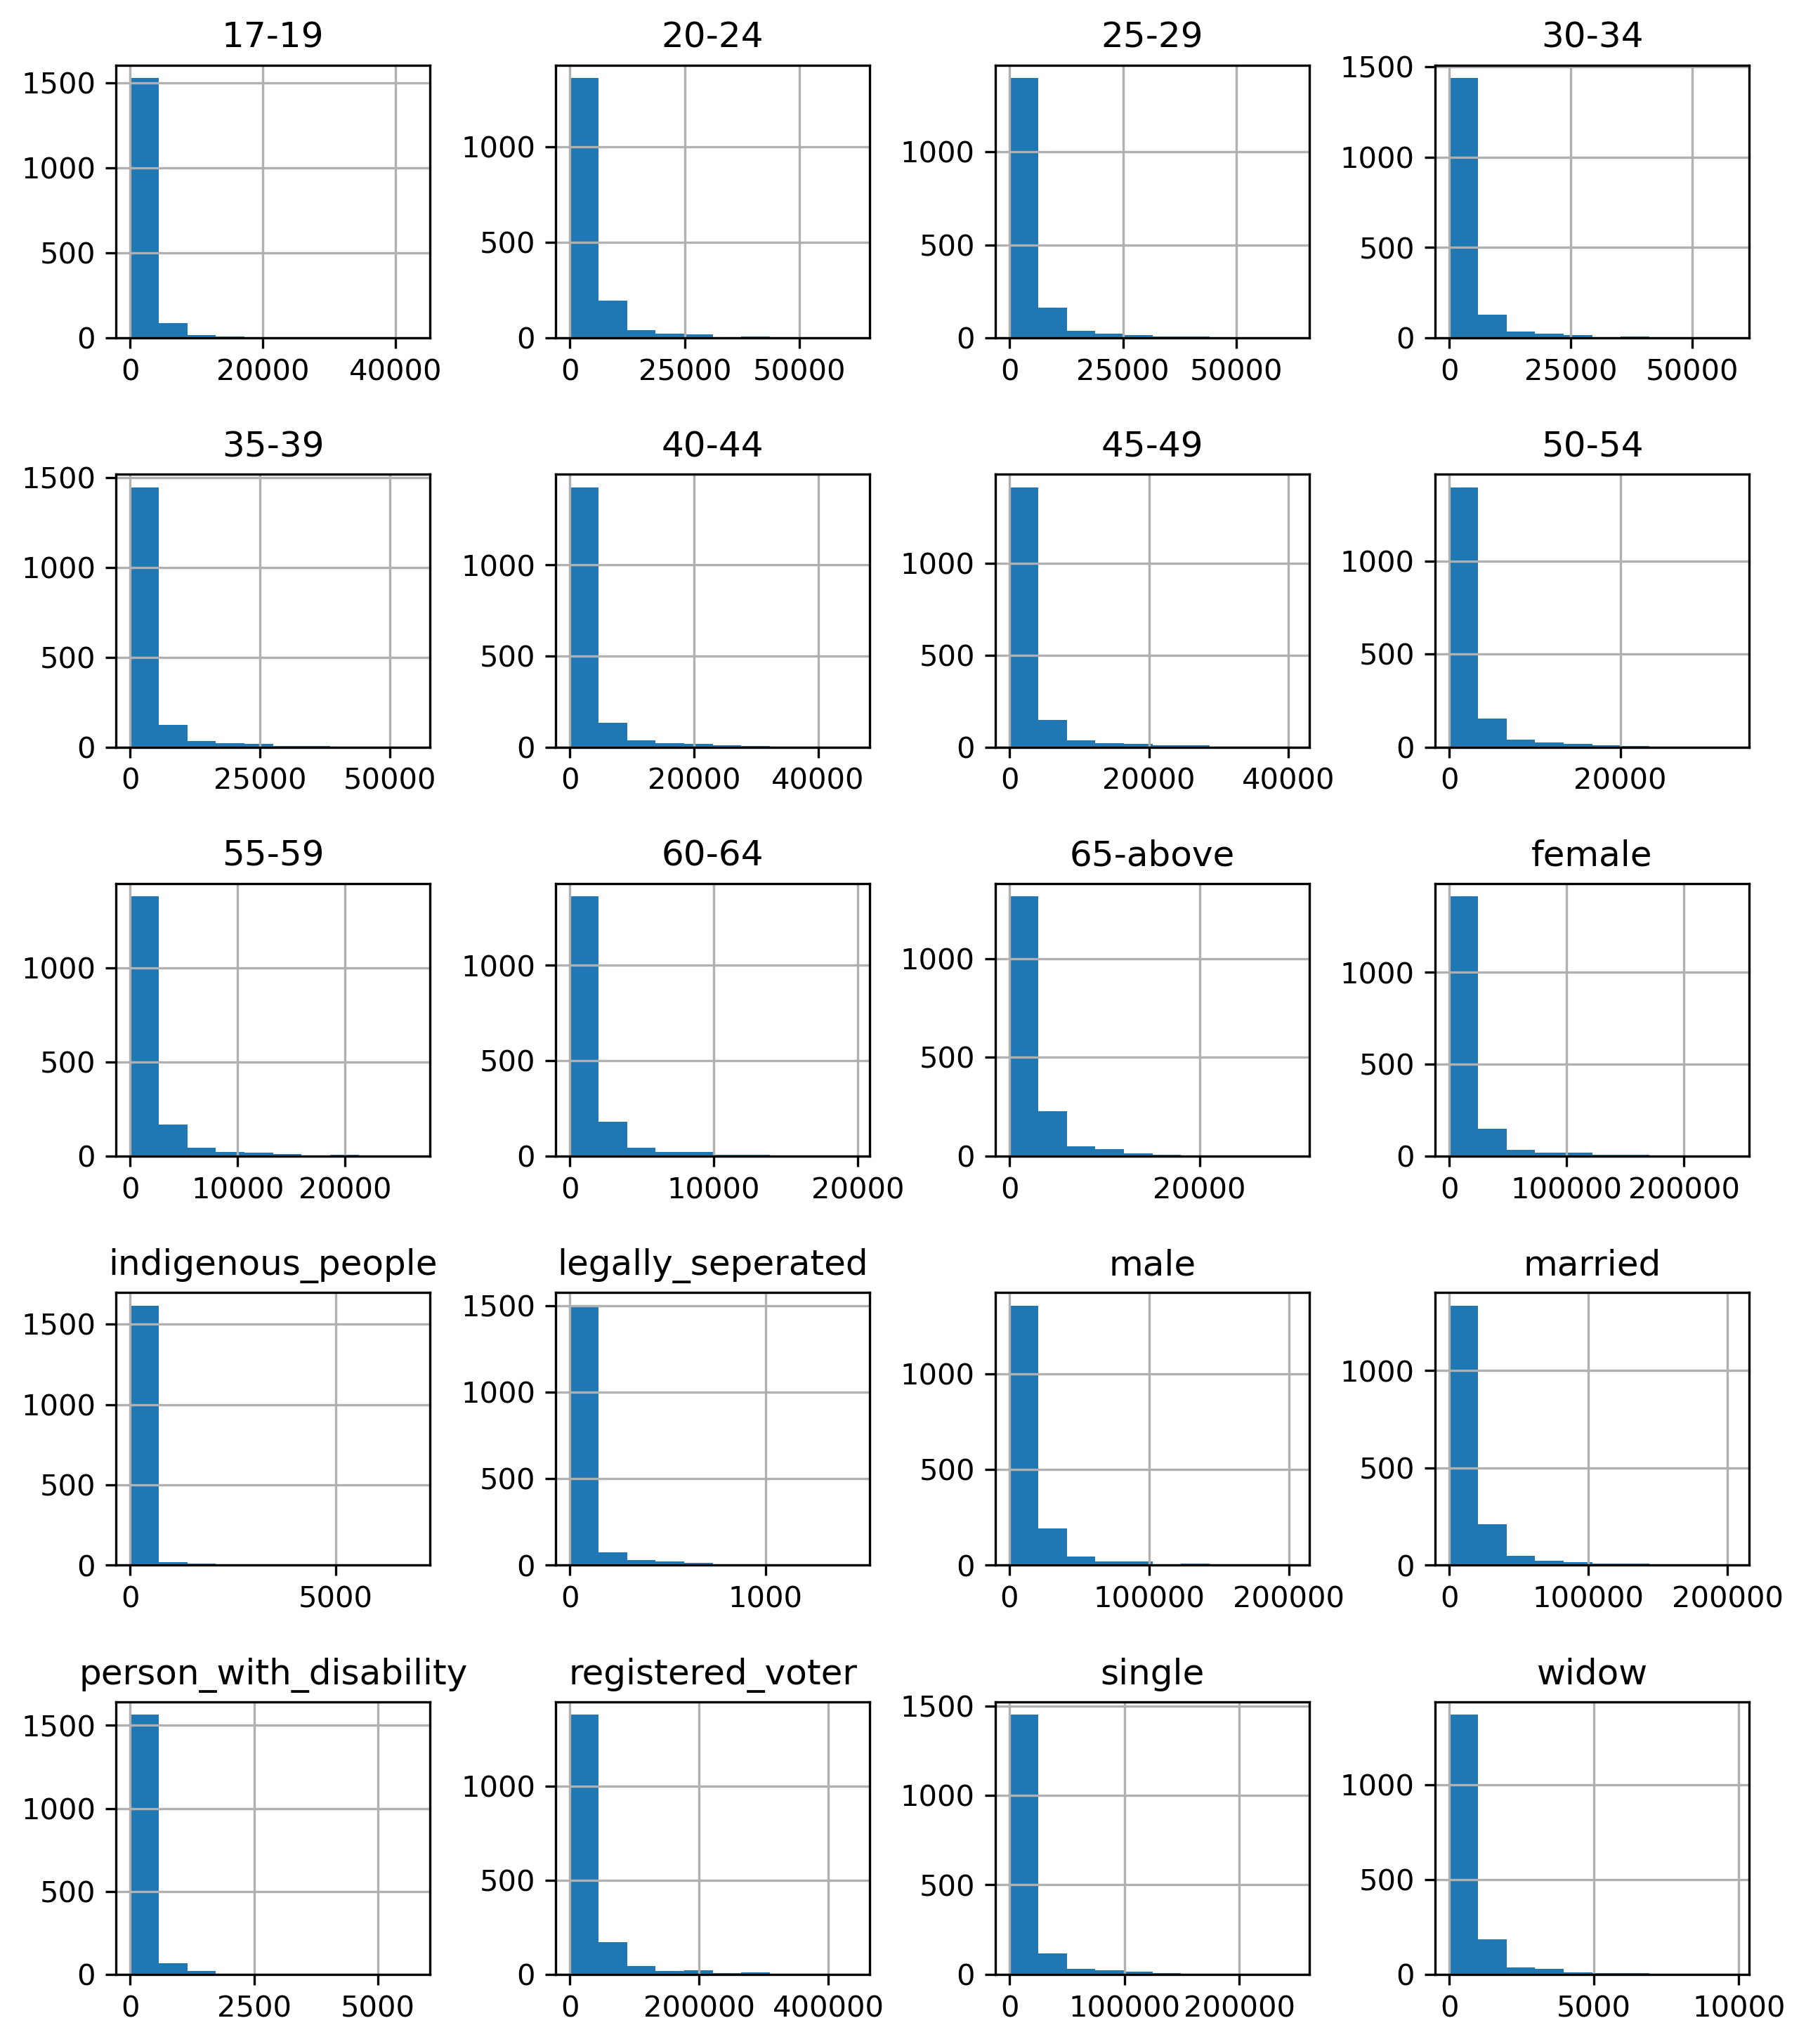

In [106]:
voters_fig = voters_profile()
axes = voters_fig.get_axes()
assert_equal(len(axes), 20)
assert_allclose(
    axes[0].get_position().get_points(), 
    [[0.125     , 0.7721428571428571],
     [0.27403846153846156, 0.88      ]])
assert_equal(
    [tl.get_text() for tl in axes[0].get_xticklabels()],
    ['−20000', '0', '20000', '40000', '60000']
)
assert_equal(
    [tl.get_text() for tl in axes[0].get_yticklabels()],
    ['0', '500', '1000', '1500', '2000']
)
assert_equal(axes[0].get_title(), '17-19')

## Problem 6
Create a function `standardize_ratings` that reads the first 1M data lines of `/mnt/data/public/movielens/20m/ml-20m/ratings.csv` and returns a `pandas` `DataFrame` with the `rating`s standardized by user. The standardized (or $z$-score) value $z$ of a value $x$ in a sample $X$ is given by $z = (x - \left<X\right>) / {\sigma_X}$ where $\left<X\right>$ is the mean of $X$ and $\sigma_X$ is the standard deviation of $X$.

In [118]:
def standardize_ratings():
    ''' reads the first 1M data lines of /mnt/data/public/movielens/20m/ml-20m
    /ratings.csv and returns a pandas DataFrame with the ratings standardized 
    by user. The standardized (or  𝑧 -score) value  𝑧  of a value  𝑥  in a 
    sample  𝑋  is given by  𝑧=(𝑥−⟨𝑋⟩)/𝜎𝑋  where  ⟨𝑋⟩  is the mean of  𝑋  and  
    𝜎𝑋  is the standard deviation of  𝑋 .
    
    Returns
    -------------
    df6: pandas DataFrame
        ratings are standardized by user
    
    '''
    df6 = pd.read_csv('/mnt/data/public/movielens/20m'
                      '/ml-20m/ratings.csv').head(1000000)
    
    df6['rating'] = df6.groupby('userId')['rating'].\
        transform(lambda x: (x - x.mean()) / x.std())
    return df6

In [119]:
df_zs = standardize_ratings()
assert_equal(isinstance(df_zs, pd.core.frame.DataFrame), True)
assert_equal(df_zs.shape, (1000000, 4))
assert_equal(
    df_zs.columns.tolist(), 
    ['userId', 'movieId', 'rating', 'timestamp'])

## Problem 7

Create a function `user_songcount` that reads `/mnt/data/public/millionsong/taste/train_triplets.txt` and returns the number of unique song IDs (second column) by the first five characters of the user ID (first column). Consider only the first 1M lines of the file.

In [7]:
def user_songcount():
    '''read /mnt/data/public/millionsong/taste/train_triplets.txt and return 
    the number of unique song IDs (second column) by the first five characters
    of the user ID (first column). Consider only the first 1M lines of the 
    file.
    
    Returns
    -------------
    output: pandas Series
       
    
    '''
    df7 = pd.read_csv('/mnt/data/public/millionsong/taste/train_'
                      'triplets.txt', sep='\t', nrows=1000000,
                      names=['userID','songID','Count'])
    df7['Count'] = df7['Count'].astype(int)
    output = df7.groupby(df7['userID'].str[:5])['songID'].nunique()
    return output

,userID,UniqSongID,Count
0,b8034,SOAKIMP12A8C130995,1
1,b8034,SOAPDEY12A81C210A9,1
2,b8034,SOBBMDR12A8C13253B,2
3,b8034,SOBFNSP12AF72A0E22,1
4,b8034,SOBFOVM12A58A7D494,1
...,...,...,...
999995,d09bc,SOYBMKC12AF72A44EC,1
999996,d09bc,SOYIEHI12A6D4F7FD0,1
999997,d09bc,SOYIOZB12A58A797FC,2
999998,d09bc,SOYJHWK12AB01894C4,1


104

In [8]:
id_songcount = user_songcount()
assert_equal(len(id_songcount), 20582)
assert_equal(id_songcount['b8034'], 104)
assert_equal(
    id_songcount[:5].index.tolist(), 
    ['00003', '0007c', '000b4', '000d2', '000eb'])
assert_equal(id_songcount[:5].to_numpy(), [ 16,  13,  31,  10, 478])

## Problem 8

Create a function `at_least_10` that reads the first 1000 data lines of `/mnt/data/public/nowplaying-rs/nowplaying_rs_dataset/user_track_hashtag_timestamp.csv` and returns only the rows belonging to `user_id`s with at least 10 unique `track_id`s.

In [2]:
def at_least_10():
    '''read the first 1000 data lines of /mnt/data/public/nowplaying-rs/
    nowplaying_rs_dataset/user_track_hashtag_timestamp.csv and return only 
    the rows belonging to user_ids with at least 10 unique track_ids.
    
    Returns
    -------------
    new_df8: pandas DataFrame
        user ids with at least 10 unique track ids
    
    '''
    df8 = pd.read_csv('/mnt/data/public/nowplaying-rs/nowplaying_rs_datas'
                      'et/user_track_hashtag_timestamp.csv').head(1000)

    S = df8.groupby('user_id')['track_id'].nunique() >= 10

    new_df8 = df8[df8['user_id'].isin(S[S==True].index)]
    return new_df8

In [3]:
df_al10 = at_least_10()
assert_equal(df_al10.shape, (161, 4))
assert_equal(
    df_al10.columns.tolist(), 
    ['user_id', 'track_id', 'hashtag', 'created_at'])
assert_equal(
    df_al10.iloc[:5].to_numpy().tolist(),
    [[15518784, 'cd15ccc7c692868532f83206bfe0f022', 'nowplaying',
      '2014-01-01 05:55:29'],
     [15518784, 'cd15ccc7c692868532f83206bfe0f022', 'listenlive',
      '2014-01-01 05:55:29'],
     [1268222954, 'd7c908a6d9ef21755b36ecca951c9b18', 'RAPGOD',
      '2014-01-01 05:55:33'],
     [1268222954, 'd7c908a6d9ef21755b36ecca951c9b18', 'MMLP2',
      '2014-01-01 05:55:33'],
     [1268222954, 'd7c908a6d9ef21755b36ecca951c9b18', 'Eminem',
      '2014-01-01 05:55:33']]
)

## Problem 9

Create a function `source_dest` that reads the first 1000 lines of `/mnt/data/public/wikipedia/clickstream/clickstream/2017-11/clickstream-enwiki-2017-11.tsv.gz` and returns a `pandas` `Series` where the index is the source (first column) and the value is the list of destination (second column) from the source.

In [61]:
def source_dest():
    '''read the first 1000 lines of /mnt/data/public/wikipedia/clickstream/
    clickstream/2017-11/clickstream-enwiki-2017-11.tsv.gz and return a pandas
    Series where the index is the source (first column) and the value is the 
    list of destination (second column) from the source.
    
    Returns
    -------------
    output9: pandas Series
        user ids with at least 10 unique track ids
    
    '''
    df9 = pd.read_csv('/mnt/data/public/wikipedia/clickstream/clickstream/'
                      '2017-11/clickstream-enwiki-2017-11.tsv.gz', 
                      nrows = 1000, sep='\t', 
                      names=['source','dest','type','num'])
    df9.head()
    output9 = df9.groupby('source')['dest'].unique()
    return output9

,source,dest,type,num
0,other-empty,Holly_Hull,external,43
1,other-search,Holly_Hull,external,18
2,other-empty,Boy_Slaves,external,57
3,Peon,Boy_Slaves,link,12
4,List_of_films_featuring_slavery,Boy_Slaves,link,27


In [62]:
sd = source_dest()
assert_equal(sd.shape, (621,))
assert_equal(len(sd['other-empty']), 164)
assert_equal(
    sd['other-empty'][:10], 
    ['Holly_Hull', 'Boy_Slaves', 'Abbot_of_Westminster', 'Industrial_musical',
     '1921_Navy_Midshipmen_football_team', 
     'Saud_bin_Abdulaziz_bin_Nasser_Al_Saud', 
     'List_of_Billboard_200_number-one_albums_of_1997', 
     'Leon_Benko', 'List_of_brand_name_snack_foods', 'Cadra'])
assert_equal(
    sd.index[:10].tolist(),
    ['1._FSV_Mainz_05', '13_Reasons_Why', '1939_in_film', '1970_in_music',
     '1976_Formula_One_season', '1976_in_Irish_television',
     '1977_in_Ireland', '1977_in_television', '1980s', '1990_in_film']
)
assert_equal(
    sd[:10].tolist(),
    [['Robin_Quaison'], ['Web_television'],
     ['Boy_Slaves'], ['Blows_Against_the_Empire'],
     ['Hesketh_308C'], ['1977_in_Irish_television'],
     ['1977_in_Irish_television'],
     ['1977_in_Irish_television'],
     ['Tom_Bailey_(musician)'], ['Ghost_(1990_film)']]
)

## Problem 10

Create a function `mean_std_votes` that reads `/mnt/data/public/elections/comelec/congress_results/congressional_results_2013.csv` and returns a `pandas` `DataFrame` with index corresponding to `province_or_city` and columns `mean` and `std` corresponding to the mean and standard deviation of the `votes_obtained` by winning candidates in the `province_or_city`.

In [59]:
def mean_std_votes():
    '''read /mnt/data/public/elections/comelec/congress_results/
    congressional_results_2013.csv and return a pandas DataFrame with index 
    corresponding to province_or_city and columns mean and std corresponding 
    to the mean and standard deviation of the votes_obtained by winning 
    candidates in the province_or_city.
    
    Returns
    -------------
    output10: pandas DataFrame
        user ids with at least 10 unique track ids
    
    '''
    df10 = pd.read_csv('/mnt/data/public/elections/comelec/congress_results/'
                       'congressional_results_2013.csv')

    df10.head()

    s = df10.groupby(['province_or_city','position'])['votes_obtained'].max()
    output10 = s.groupby(level='province_or_city').agg([np.mean, np.std])
    return output10

,province_or_city,position,name,nickname,party_affiliation,votes_obtained
0,Abra,Representative-Lone District,"Bernos, Maria Jocelyn Valera",Joy,Liberal Party,78447
1,Agusan del Norte,Representative-1st District,"Fortun, Lawrence Lemuel Hernandez",Law,Liberal Party,94483
2,Agusan del Norte,Representative-2nd District,"Amante, ErLiberal Partye John Malbas",Ping,KUSGAN,102240
3,Agusan del Sur,Representative-1st District,"Plaza, Maria Valentina Galido",Tina,National Unity Party,74537
4,Agusan del Sur,Representative-2nd District,"Mellana, Evelyn Plaza",Bebs,National Unity Party,64027


In [60]:
df_msv = mean_std_votes()
assert_equal(df_msv.shape, (108, 2))
assert_equal(
    df_msv.index[:10].tolist(),
    ['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay',
     'Antique', 'Apayao', 'Aurora', 'Basilan', 'Bataan']
)
assert_allclose(
    df_msv.iloc[:10].to_numpy(),
    [[ 78447.        ,             np.nan],
     [ 98361.5       ,   5485.02730166],
     [ 69282.        ,   7431.69227027],
     [104438.        ,             np.nan],
     [116828.        ,  35667.59745203],
     [124526.        ,             np.nan],
     [ 41871.        ,             np.nan],
     [ 58996.        ,             np.nan],
     [ 96816.        ,             np.nan],
     [111982.5       ,  25663.0264096 ]]
)